In [70]:
# import dependencies
import pandas as pd
import numpy as np
import random
import requests
from api_keys import api_key
from citipy import citipy
import pprint
import matplotlib.pyplot as plt

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## List of Cities

In [41]:
# Create a set of random lat and lng combinations

lats = np.random.uniform(-90.000, 90.000, size=50)
lngs = np.random.uniform(-180.000, 180.000, size=50)

lat_lng = list(zip(lats, lngs))

cities = []
countries = []

for coordinate in lat_lng:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    code = citipy.nearest_city(coordinate[0], coordinate[1]).country_code
    if city not in cities:
        cities.append(city)
        countries.append(code)

city_country = list(zip(cities, countries))

len(city_country)

42

In [79]:
url = "http://api.openweathermap.org/data/2.5/weather?"

unit = "imperial" 

query_url = f"{url}appid={api_key}&units={unit}&q="



In [80]:
print ("Beginning data retrieval...")
print ("----------------------------")

found_cities = []
found_countries = []
found_lats = []
found_lngs = []
date = []
cloudiness = []
humidity = []
max_temp = []
wind_speed = []

for place in city_country:
    
    query = place[0].replace(" ", "+") + "," + place[1].replace(" ", "+")
    
    city_data = requests.get(query_url + query).json()
    
    if city_data["cod"] == "404":
        print(place[0] + " was not found...skippping")
    
    
    else:
        print ("Processing data for " + place[0])
        #print (query_url + query)
        found_cities.append(place[0])
        found_countries.append(place[1])
        date.append(city_data["dt"])
        cloudiness.append(city_data["clouds"]["all"])
        humidity.append(city_data["main"]["humidity"])
        max_temp.append(city_data["main"]["temp_max"])
        wind_speed.append(city_data["wind"]["speed"])
        found_lats.append(city_data["coord"]["lat"])
        found_lngs.append(city_data["coord"]["lon"])

Beginning data retrieval...
----------------------------
Processing data for albany
Processing data for mitsamiouli
Processing data for qaanaaq
barentsburg was not found...skippping
Processing data for butaritari
Processing data for tiksi
warqla was not found...skippping
Processing data for kapaa
Processing data for lebu
Processing data for hobart
Processing data for san policarpo
mergui was not found...skippping
Processing data for bethel
Processing data for mizdah
Processing data for lompoc
Processing data for sinnamary
Processing data for hamilton
Processing data for syracuse
Processing data for la ronge
Processing data for carnarvon
Processing data for tuktoyaktuk
Processing data for tasiilaq
Processing data for nantucket
Processing data for dikson
Processing data for bulungu
Processing data for atuona
Processing data for yellowknife
Processing data for pangnirtung
Processing data for vikhorevka
Processing data for souillac
Processing data for ushuaia
belushya guba was not found...

## DataFrame of City Weather Data

In [81]:
weather_df = pd.DataFrame({"City" : found_cities, "Country" : found_countries, "Date" : date,
                   "Lat" : found_lats, "Lng" : found_lngs, "Max Temp": max_temp, "Humidity" : humidity, 
                   "Cloudiness" : cloudiness, "Wind Speed" : wind_speed})

weather_df.to_csv("../Output/city_weather.csv")

weather_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,albany,au,1561249468,-35.02,117.88,53.60,93,40,10.29
1,mitsamiouli,km,1561249468,-11.38,43.28,78.25,73,16,11.77
2,qaanaaq,gl,1561249469,77.48,-69.36,31.81,85,100,14.72
3,butaritari,ki,1561249469,3.07,172.79,84.73,73,87,8.46
4,tiksi,ru,1561249458,71.64,128.87,50.71,62,0,14.03


## Temperature v Latitude

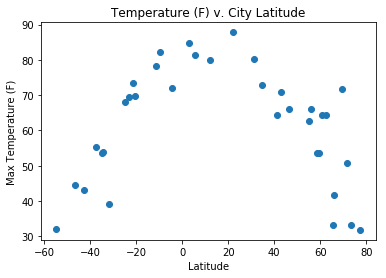

In [100]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"]);
plt.title("Temperature (F) v. City Latitude");
plt.ylabel("Max Temperature (F)");
plt.xlabel("Latitude");

## Humidity v Latitude

Text(0.5, 0, 'Latitude')

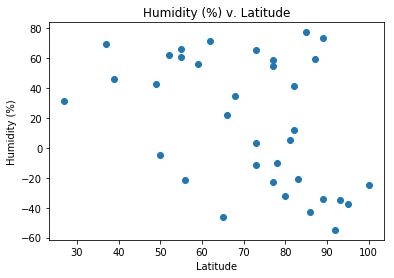

In [93]:
plt.scatter(weather_df["Humidity"], weather_df["Lat"]);
plt.title("Humidity (%) v. City Latitude");
plt.ylabel("Humidity (%)");
plt.xlabel("Latitude");

## Cloudiness v Latitude

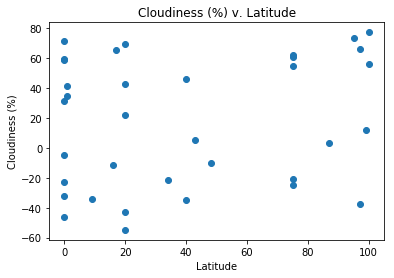

In [96]:
plt.scatter(weather_df["Cloudiness"], weather_df["Lat"]);
plt.title("Cloudiness (%) v. City Latitude");
plt.ylabel("Cloudiness (%)");
plt.xlabel("Latitude");

## Wind Speed v Latitude

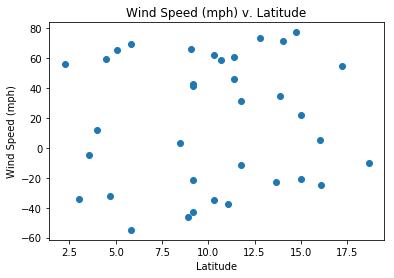

In [99]:
plt.scatter(weather_df["Wind Speed"], weather_df["Lat"]);
plt.title("Wind Speed (mph) v. City Latitude");
plt.ylabel("Wind Speed (mph)");
plt.xlabel("Latitude");